In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append("/home/z5297792/UNSW-MRes/MRes/modules") 
from utils import plot_ellipse, find_directional_radii, calc_tang_vel, find_optimal_psi0


,xc,yc,w,Q11,Q12,Q22,Rc,psi0,q11,q12,q22
Control,0.0,0.0,8.0,-0.016,-0.008,-0.016,100.0,80.0,2.0,1.0,2.0


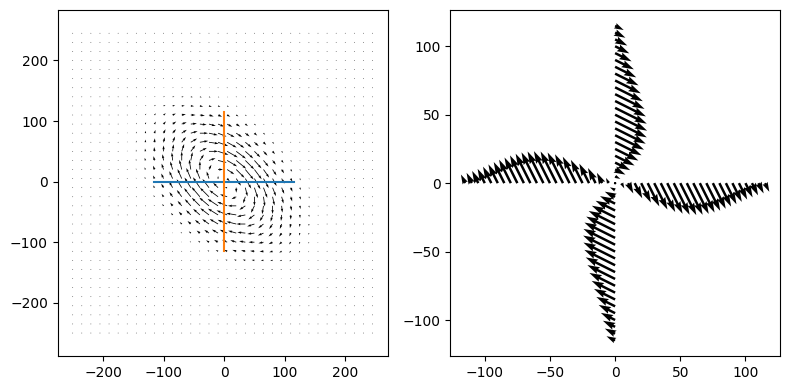

In [2]:
# Generate Eddy
width=500
x = np.linspace(-width // 2, width // 2, 101)
y = np.linspace(-width // 2, width // 2, 101)
X, Y = np.meshgrid(x, y, indexing='ij')
psi0 = 80.0
Rc = 100.0
xc, yc = 0.0, 0.0
q11, q12, q22 = 2.0, 1.0, 2.0

dx, dy = X-xc, Y-yc
rho      = q11*dx**2 + 2*q12*dx*dy + q22*dy**2
rho_x    = 2*q11*dx   + 2*q12*dy
rho_y    = 2*q12*dx   + 2*q22*dy
exp_t    = np.exp(-rho/Rc**2)
u   =  psi0/Rc**2 * rho_y * exp_t
v   = -psi0/Rc**2 * rho_x * exp_t

s = -psi0 / Rc**2
Q11, Q12, Q22 = s*q11, s*q12, s*q22

df_res = pd.DataFrame({'xc': xc, 'yc': yc, 'w': 2*(q11+q22), 'Q11': Q11, 'Q12': Q12, 'Q22': Q22, 'Rc': Rc, 'psi0': psi0, 'q11': q11, 'q12': q12, 'q22': q22}, index=['Control'])

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
spac = 3
axs[0].quiver(X[::spac, ::spac], Y[::spac, ::spac], u[::spac, ::spac], v[::spac, ::spac], scale=30)
axs[0].axis('equal')

# Transect Data
nic, njc, r = len(x)//2, len(y)//2, 120
xr, yr = x[nic], y[njc]

# horizontal transect (constant y = y[jc])
x_mask = np.abs(x - xr) < r
x1 = x[x_mask]
y1 = np.full_like(x1, y[njc])
u1 = u[x_mask, njc]
v1 = v[x_mask, njc]
axs[0].plot(x1, y1)
axs[1].quiver(x1, y1, u1, v1, scale=10)
# vertical transect (constant x = x[ic])
y_mask = np.abs(y - yr) < r
y2 = y[y_mask]
x2 = np.full_like(y2, x[nic])
u2 = u[nic, y_mask]
v2 = v[nic, y_mask]
axs[0].plot(x2, y2)
axs[1].quiver(x2, y2, u2, v2, scale=10)

plt.tight_layout()

df_res
                  

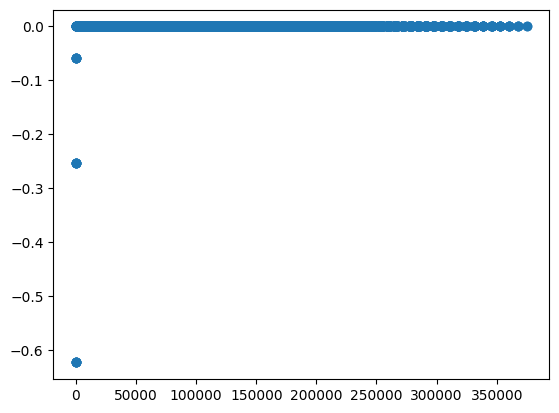

In [3]:
v_theta_theory = -2*rho*psi0/Rc**2*np.exp(-rho**2/Rc**2)
plt.scatter(rho, v_theta_theory)


np.float64(100.0)

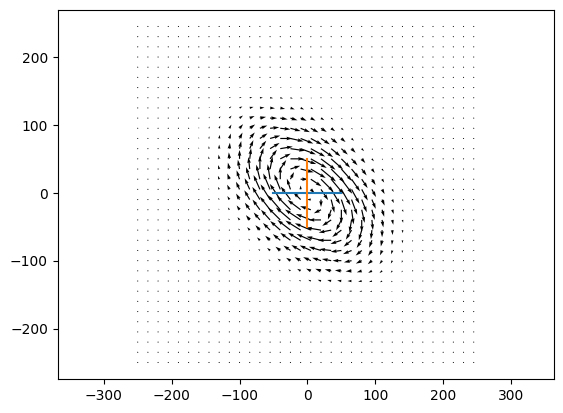

In [4]:
plt.quiver(X[::spac, ::spac], Y[::spac, ::spac], u[::spac, ::spac], v[::spac, ::spac], scale=30)
plt.axis('equal')

radii = find_directional_radii(u, v, X, Y, xc, yc, calc_tang_vel, return_index=True)

i0, i1 = nic - radii['left'],  nic + radii['right']
x1 = x[i0:i1+1]
y1 = np.full(x1.shape, y[njc])
u1 = u[i0:i1+1, njc]
v1 = v[i0:i1+1, njc]
plt.plot(x1, y1)

j0, j1 = njc - radii['down'], njc + radii['up']
y2 = y[j0:j1+1]
x2 = np.full(y2.shape, x[nic])
u2 = u[nic, j0:j1+1]
v2 = v[nic, j0:j1+1]
plt.plot(x2, y2)
plt.axis('equal')

r_peak = np.mean([np.abs(x[i0]-xc), np.abs(x[i1]-xc), np.abs(y[j0]-xc), np.abs(y[j1]-xc)])
Rc_guess = r_peak * np.sqrt(2*q11)
Rc_guess


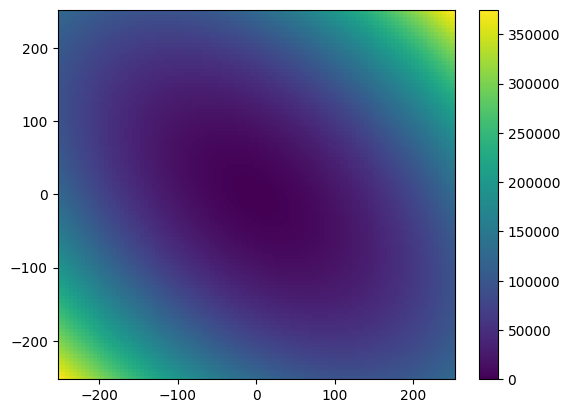

In [5]:
plt.pcolor(X, Y, rho)
plt.colorbar()